In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from sklearn import preprocessing

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [17]:
train_df = pd.read_csv("data/train.csv", index_col=0)
test_df = pd.read_csv("data/test.csv", index_col=0)

In [18]:
hazards = train_df.Hazard
summary = stats.describe(hazards)
train_df.drop('Hazard', axis=1, inplace=True)
print min(hazards), max(hazards)
print "Mean: {0}\nVariance: {1}\nTotal number of observations: {2}".format(summary.mean, summary.variance, summary.nobs)

1 69
Mean: 4.02278476049
Variance: 16.1699973354
Total number of observations: 50999


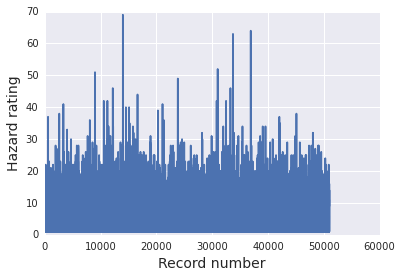

In [19]:
plt.plot(range(len(hazards)), hazards)
plt.xlabel("Record number", fontsize=14)
plt.ylabel("Hazard rating", fontsize=14)

(1, 100)

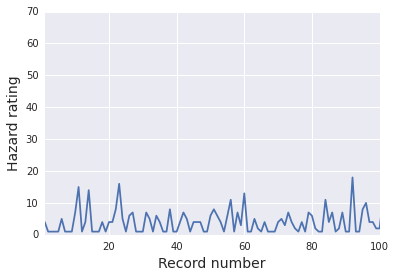

In [20]:
plt.plot(range(len(hazards)), hazards)
plt.xlabel("Record number", fontsize=14)
plt.ylabel("Hazard rating", fontsize=14)
plt.xlim(1,100)

In [21]:
train = np.array(train_df)
test = np.array(test_df)
# label encode the categorical variables
for i in range(train.shape[1]):
    if type(train[1,i]) is str:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[:,i]) + list(test[:,i]))
        train[:,i] = lbl.transform(train[:,i])
        test[:,i] = lbl.transform(test[:,i])
train = train.astype(float)

TypeError: 'int' object has no attribute '__getitem__'

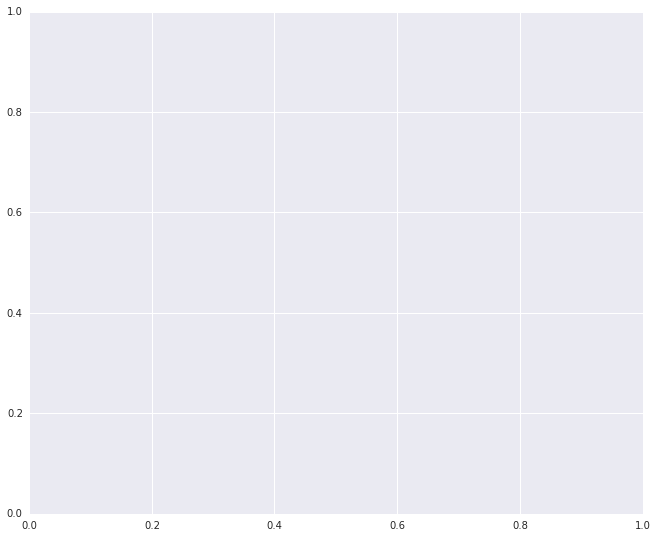

In [24]:
corr = np.corrcoef(train.T)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [ ]:
ytickslabel

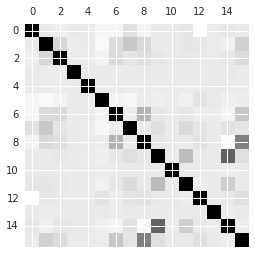

In [25]:
plt.matshow(train_df.corr())